In [32]:
from selenium import webdriver
driver=webdriver.Chrome('/Users/huangyuting/Desktop/c/chromedriver')
driver.get('https://comic.aya.click/online/b-11011.html?ch=1')

In [12]:
#driver.page_source

In [33]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(driver.page_source,'lxml')

In [34]:
print('https:'+soup.select_one('#TheImg').get('src'))

https://img2.8comic.com/3/11011/1/001_vEd.jpg


In [35]:
import requests
res=requests.get('https:'+soup.select_one('#TheImg').get('src'))
with open ('test.jpg','wb') as f:
    f.write(res.content)

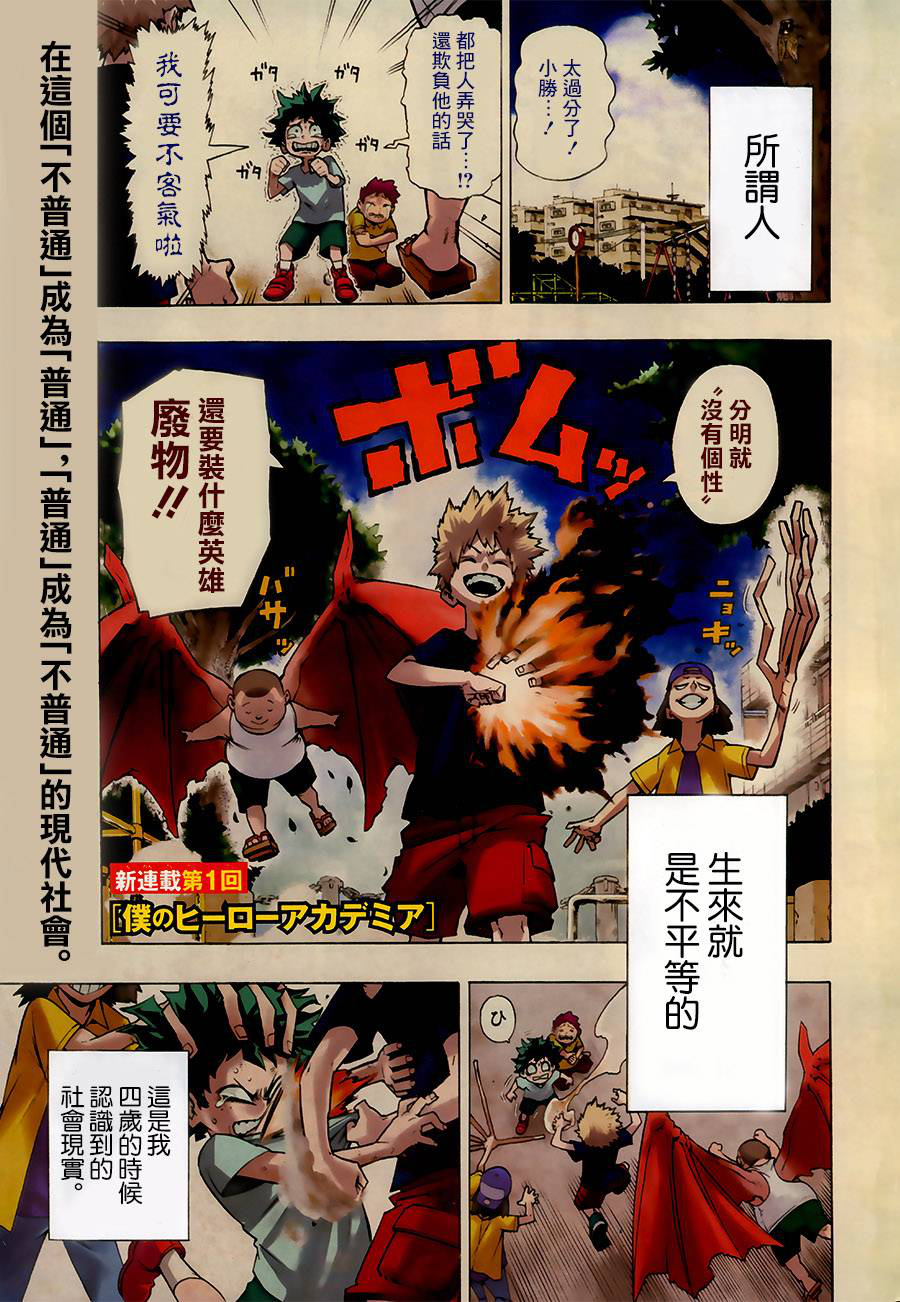

In [36]:
from PIL import Image
Image.open('test.jpg')

In [37]:
pagenum=int(soup.select_one('#pagenum').text.split('/')[1].strip('頁'))

In [38]:
import time
pageurl='https://comic.aya.click/online/b-11011.html?ch=1-{}'
for i in range(pagenum):
    driver.get(pageurl.format(i+1))
    soup=BeautifulSoup(driver.page_source,'lxml')
    imgurl='https:'+soup.select_one('#TheImg').get('src')
    res=requests.get(imgurl)
    with open ('{}.jpg'.format(i),'wb') as f:
        f.write(res.content)
    time.sleep(1)